In [10]:
%pylab inline
!source smai/bin/activate
!pip3 install matplotlib
import matplotlib.pyplot as plt
import random

Populating the interactive namespace from numpy and matplotlib
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3.6 -m pip install --upgrade pip' command.


In [11]:
def plotPCA(data, labels, pointSize):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    targets = labels
    for target in targets:
        indicesToKeep = data['labels'] == target
        ax.scatter(data.loc[indicesToKeep, 'principal component 1']
                   , data.loc[indicesToKeep, 'principal component 2']
                   , c = "#"+''.join([random.choice(list('ABCDEF0123456789')) for i in range(6)])
                   , s = pointSize)

## MNIST DataSet

In [12]:
!pip3 install python-mnist
from mnist.loader import MNIST
mndata = MNIST('samples')
trainImage, trainLables = mndata.load_training()
testImage, testLables = mndata.load_testing()

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3.6 -m pip install --upgrade pip' command.


In [13]:
!pip3 install -U scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
trainImage = scaler.fit_transform(trainImage)
pca = PCA(n_components=2)
principleComponents = pca.fit_transform(trainImage)

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3.6 -m pip install --upgrade pip' command.


In [14]:
!pip3 install pandas
!pip3 install numpy
import pandas as pd
import numpy as np
principalDf = pd.DataFrame(data = principleComponents
             , columns = ['principal component 1', 'principal component 2'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3.6 -m pip install --upgrade pip' command.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3.6 -m pip install --upgrade pip' command.


In [15]:
principalDf.insert(loc=len(principalDf.columns), column="labels", value=np.array(trainLables))

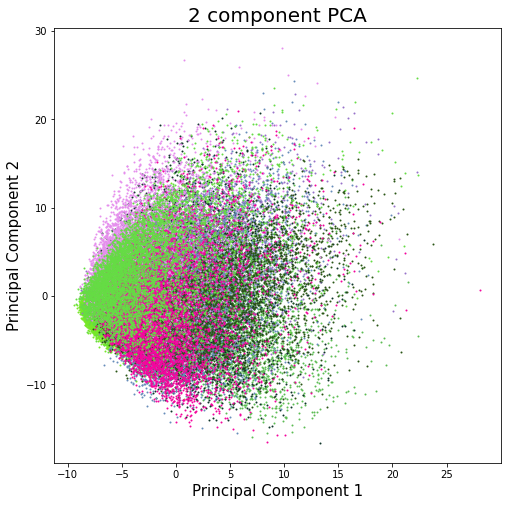

In [16]:
plotPCA(principalDf, np.linspace(1,10,10), 1)

## Oliveretti faces dataset

In [17]:
from sklearn import datasets
datasetOlivetti = datasets.fetch_olivetti_faces()

In [18]:
scaler = StandardScaler()
trainImage = scaler.fit_transform(datasetOlivetti["data"])
pca = PCA(n_components=2)
principleComponents = pca.fit_transform(trainImage)

In [19]:
import pandas as pd
principalDf = pd.DataFrame(data = principleComponents
             , columns = ['principal component 1', 'principal component 2'])

In [20]:
principalDf.insert(loc=len(principalDf.columns), column="labels", value=np.array(datasetOlivetti["target"]))

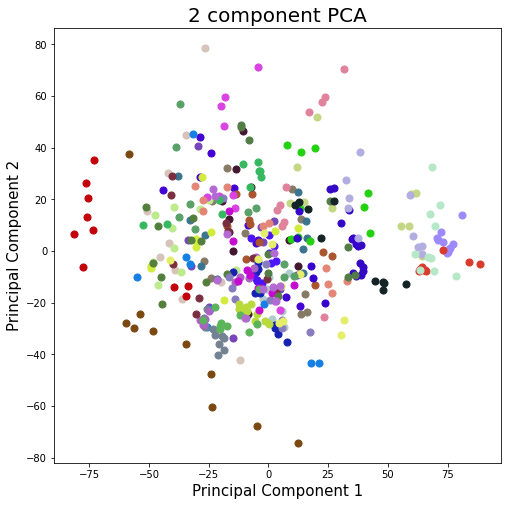

In [21]:
plotPCA(principalDf, set(datasetOlivetti["target"]), 50)

## COIL-20 faces dataset

In [22]:
from os import listdir
from matplotlib import image
loaded_images = list()
for filename in listdir('coil-20-proc'):
    img_data = image.imread('coil-20-proc/' + filename)
    loaded_images.append(img_data)

In [23]:
oned_loaded_images = np.reshape(loaded_images, (1440, 16384))

In [48]:
scaler = StandardScaler()
trainImage = scaler.fit_transform(oned_loaded_images)
pca = PCA(n_components=2)
principleComponents = pca.fit_transform(trainImage)
print(trainImage.shape)

(1440, 16384)


In [25]:
labelsList = [i for i in range(1,21) for j in range(72)]

In [26]:
principalDf = pd.DataFrame(data = principleComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.insert(loc=len(principalDf.columns), column="labels", value=np.array(labelsList))

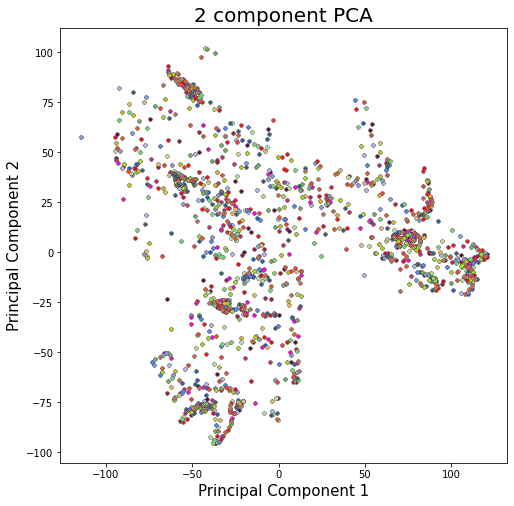

In [27]:
plotPCA(principalDf, labelsList, 5)

In [28]:
!pip3 install opencv-python
import cv2

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3.6 -m pip install --upgrade pip' command.


# Animals - 10 dataset

In [29]:
import os
BATCH_SIZE = 100

In [52]:
files = [f for f in os.listdir("animals-10/training")]
print(files[0:10])

['2_img_1553497001558.jpg', '5_img_1553496695676.jpg', '7_img_1553496944058.jpg', '1_img_1553496438690.jpg', '7_img_1553497103130.jpg', '1_img_1553496433731.jpg', '1_img_1553496393478.jpg', '4_img_1553496534912.jpg', '2_img_1553496603316.jpg', '9_img_1553496420863.jpg']


In [54]:
standardScaler = StandardScaler() 
pca = PCA(n_components=2)
images = []
tag = []
cnt = 0
for file in files:
    img = cv2.imread("./animals-10/training/"+file)
    b, g, r = cv2.split(img)
    b = b.flatten()
    g = g.flatten()
    r = r.flatten()
    image_vector = b + g + r
    images.append(image_vector)
    tag.append(ord(file[0]) - 48)
    cnt += 1
images = np.array(images)
print(images.shape)
print(len(images))
print(len(images[0]))
transformed_images = pca.fit_transform(images)
print(transformed_images)

(50000, 4096)
50000
4096
[[ 2638.58282372  -192.39741513]
 [ -510.60131662  -864.78116058]
 [  454.47133645  -236.44230492]
 ...
 [-5333.98476028   156.7692265 ]
 [-1239.53399601   377.45639118]
 [  715.16149168   863.22267417]]


In [55]:
print(transformed_images)

[[ 2638.58282372  -192.39741513]
 [ -510.60131662  -864.78116058]
 [  454.47133645  -236.44230492]
 ...
 [-5333.98476028   156.7692265 ]
 [-1239.53399601   377.45639118]
 [  715.16149168   863.22267417]]


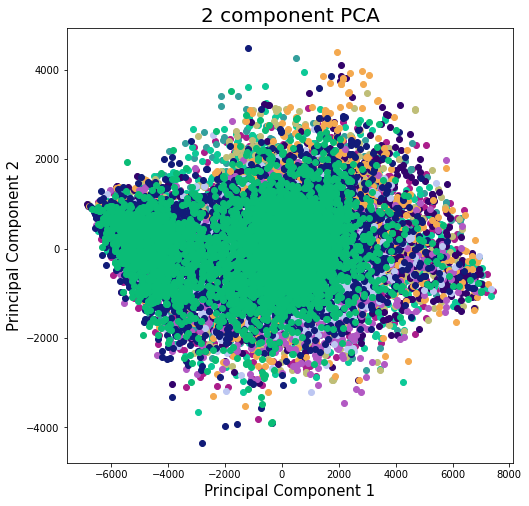

In [58]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
for index in range(10):
    here_x = []
    here_y = []
    for i in range(len(tag)):
        if tag[i] == index:
            here_x.append(transformed_images[i][0])
            here_y.append(transformed_images[i][1])
    ax.scatter(here_x, here_y, c = "#"+''.join([random.choice(list('ABCDEF0123456789')) for i in range(6)]))